## **Travel Tide Loyality Program Project**

**1. Intial Data Filteration for the Idenfication of the Project Cohort and Necessary Recodings**

In [3]:
#improrting required labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.io.sql as sqlio
#import psycopg2 as ps
import sqlalchemy as sa
import plotly.express as px

In [4]:
metrics_data=pd.read_csv('/Users/asmeromtaddesefishaley/Downloads/metrics_data.csv')

In [5]:
metrics_data.head()

Unnamed: 0  user_id  gender  married  has_children  home_country  \
0           0   637633     1.0      0.0           0.0           0.0   
1           1   637687     1.0      1.0           0.0           1.0   
2           2   638140     1.0      0.0           1.0           1.0   
3           3   638162     1.0      0.0           0.0           1.0   
4           4   638237     1.0      0.0           1.0           0.0   

   session_id_nunique  trip_id_nunique  user_age_mean  flight_discount_sum  \
0                 8.0              3.0           37.0                    1   
1                 8.0              4.0           40.0                    2   
2                 8.0              2.0           39.0                    1   
3                 8.0              6.0           33.0                    3   
4                 9.0              0.0           24.0                    0   

   ...  people_travel_rate  nights_travel_rate  \
0  ...            0.666667            1.666667   
1  ...            1.250000            1.500000   
2  ...            2.500000            3.000000   
3  ...            0.500000            3.166667   
4  ...            0.000000            0.000000   

   flightbooking_to_discount_rate  hotelbooking_to_discount_rate  \
0                             2.0                            2.0   
1                             2.0                            0.0   
2                             2.0                            1.0   
3                             1.0                            0.0   
4                             0.0                            0.0   

   frequent_travellers  travellers_with_children  individual_travellers  \
0                  0.0                       0.0                    0.0   
1                  0.0                       0.0                    0.0   
2                  0.0                       1.0                    0.0   
3                  1.0                       0.0                    0.0   
4                  0.0                       0.0                    0.0   

   luxury_travellers  distant_travellers  backpackers_travellers  
0                0.0                 0.0                     1.0  
1                0.0                 0.0                     0.0  
2                0.0                 0.0                     0.0  
3                0.0                 0.0                     0.0  
4                0.0                 0.0                     0.0  

[5 rows x 47 columns]

In [6]:
metrics_data=metrics_data.iloc[:,1:]

In [7]:
metrics_data.head()

user_id  gender  married  has_children  home_country  session_id_nunique  \
0   637633     1.0      0.0           0.0           0.0                 8.0   
1   637687     1.0      1.0           0.0           1.0                 8.0   
2   638140     1.0      0.0           1.0           1.0                 8.0   
3   638162     1.0      0.0           0.0           1.0                 8.0   
4   638237     1.0      0.0           1.0           0.0                 9.0   

   trip_id_nunique  user_age_mean  flight_discount_sum  hotel_discount_sum  \
0              3.0           37.0                    1                   1   
1              4.0           40.0                    2                   0   
2              2.0           39.0                    1                   2   
3              6.0           33.0                    3                   0   
4              0.0           24.0                    0                   0   

   ...  people_travel_rate  nights_travel_rate  \
0  ...            0.666667            1.666667   
1  ...            1.250000            1.500000   
2  ...            2.500000            3.000000   
3  ...            0.500000            3.166667   
4  ...            0.000000            0.000000   

   flightbooking_to_discount_rate  hotelbooking_to_discount_rate  \
0                             2.0                            2.0   
1                             2.0                            0.0   
2                             2.0                            1.0   
3                             1.0                            0.0   
4                             0.0                            0.0   

   frequent_travellers  travellers_with_children  individual_travellers  \
0                  0.0                       0.0                    0.0   
1                  0.0                       0.0                    0.0   
2                  0.0                       1.0                    0.0   
3                  1.0                       0.0                    0.0   
4                  0.0                       0.0                    0.0   

   luxury_travellers  distant_travellers  backpackers_travellers  
0                0.0                 0.0                     1.0  
1                0.0                 0.0                     0.0  
2                0.0                 0.0                     0.0  
3                0.0                 0.0                     0.0  
4                0.0                 0.0                     0.0  

[5 rows x 46 columns]

In [8]:
metrics_data.corr()

user_id    gender   married  has_children  \
user_id                         1.000000  0.017412  0.003262      0.005549   
gender                          0.017412  1.000000  0.033326     -0.019343   
married                         0.003262  0.033326  1.000000      0.158666   
has_children                    0.005549 -0.019343  0.158666      1.000000   
home_country                   -0.006892 -0.004886  0.020273      0.013058   
session_id_nunique             -0.577009  0.086838  0.039532      0.001497   
trip_id_nunique                -0.217597  0.019085  0.003600     -0.078300   
user_age_mean                   0.023813  0.011967  0.445714     -0.000324   
flight_discount_sum            -0.071003  0.016025  0.001054      0.015760   
hotel_discount_sum             -0.091525  0.001792  0.026008     -0.002538   
flight_booked_sum              -0.208489  0.003182 -0.008419     -0.076948   
hotel_booked_sum               -0.210520  0.010661 -0.001708     -0.070356   
booking_sum                    -0.230237  0.013435 -0.000405     -0.073961   
cancellation_sum               -0.103825 -0.025882 -0.020100      0.008646   
flight_discount_amount_sum     -0.031817  0.008251  0.010848      0.008781   
hotel_discount_amount_sum      -0.055365  0.006918  0.026767      0.004711   
page_clicks_sum                -0.184902 -0.028122 -0.029876     -0.033367   
session_durations_sum          -0.116960 -0.032351 -0.027510     -0.007698   
total_spending_sum             -0.198731 -0.013457  0.054157      0.019466   
return_flight_booked_sum       -0.217123  0.023721  0.009699     -0.075222   
seats_sum                      -0.197374 -0.000354  0.025078     -0.043749   
checked_bags_sum               -0.146716 -0.006456  0.057249      0.000872   
base_fare_usd_sum              -0.185600 -0.010059  0.057601      0.013901   
nights_sum                     -0.167760  0.020285  0.017287     -0.039554   
rooms_sum                      -0.181049  0.012561  0.009188     -0.062803   
hotel_per_room_usd_sum         -0.154158  0.007955  0.000314     -0.053225   
trip_durations_sum             -0.011519 -0.020953 -0.021860     -0.019077   
hotel_durations_sum            -0.177959  0.020252  0.016258     -0.047276   
distance_flown_sum             -0.197849  0.005610 -0.000988     -0.058266   
cancellation_rate              -0.053331 -0.023880 -0.023835      0.015914   
flight_hotel_rate              -0.062969 -0.011560  0.012223     -0.016566   
trip_session_rate              -0.120496  0.004999 -0.002173     -0.079011   
trip_spending_rate             -0.077211 -0.018345  0.052502      0.057652   
trip_flown_rate                -0.072991 -0.016051  0.007428     -0.001091   
trip_spending_per_person_rate   0.006766 -0.024432  0.008283      0.040665   
trip_spending_per_night_rate    0.000674 -0.027164  0.031457      0.039860   
people_travel_rate             -0.064097 -0.024962  0.048213      0.034537   
nights_travel_rate             -0.046992  0.016811  0.006138     -0.006615   
flightbooking_to_discount_rate -0.114813 -0.003191 -0.009649     -0.057711   
hotelbooking_to_discount_rate  -0.143873  0.000006 -0.006489     -0.028874   
frequent_travellers            -0.135925  0.008334 -0.037142     -0.071009   
travellers_with_children       -0.059887 -0.012776  0.087568      0.453197   
individual_travellers           0.095645 -0.033000 -0.023614      0.029091   
luxury_travellers              -0.009308 -0.013689  0.010028      0.018564   
distant_travellers             -0.143140 -0.002653 -0.023544     -0.052434   
backpackers_travellers          0.018694 -0.014579  0.003300      0.004637   

                                home_country  session_id_nunique  \
user_id                            -0.006892           -0.577009   
gender                             -0.004886            0.086838   
married                             0.020273            0.039532   
has_children                        0.013058            0.001497   
home_country              

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
metrics_data_scaled = scaler.fit_transform(metrics_data)

In [11]:
metrics_data_scaled

array([[ 1.42010545,  0.36525186, -0.88726925, ..., -0.1568393 ,
        -0.47732623,  3.16954895],
       [ 1.42093725,  0.36525186,  1.1270536 , ..., -0.1568393 ,
        -0.47732623, -0.31550231],
       [ 1.42791514,  0.36525186, -0.88726925, ..., -0.1568393 ,
        -0.47732623, -0.31550231],
       ...,
       [ 1.41683985,  0.36525186,  1.1270536 , ..., -0.1568393 ,
        -0.47732623, -0.31550231],
       [ 1.41739439,  0.36525186, -0.88726925, ..., -0.1568393 ,
        -0.47732623, -0.31550231],
       [ 1.41890395, -2.73783687,  1.1270536 , ..., -0.1568393 ,
        -0.47732623, -0.31550231]])

In [12]:
metrics_data_scaled = pd.DataFrame(metrics_data_scaled)
metrics_data_scaled.index = metrics_data.index
metrics_data_scaled.columns = metrics_data.columns
metrics_data_scaled

user_id    gender   married  has_children  home_country  \
0     1.420105  0.365252 -0.887269     -0.696171     -2.226276   
1     1.420937  0.365252  1.127054     -0.696171      0.449181   
2     1.427915  0.365252 -0.887269      1.436430      0.449181   
3     1.428254  0.365252 -0.887269     -0.696171      0.449181   
4     1.429409  0.365252 -0.887269      1.436430     -2.226276   
...        ...       ...       ...           ...           ...   
5993  1.411510  0.365252  1.127054     -0.696171      0.449181   
5994  1.411680  0.365252 -0.887269     -0.696171      0.449181   
5995  1.416840  0.365252  1.127054      1.436430      0.449181   
5996  1.417394  0.365252 -0.887269     -0.696171      0.449181   
5997  1.418904 -2.737837  1.127054     -0.696171      0.449181   

      session_id_nunique  trip_id_nunique  user_age_mean  flight_discount_sum  \
0              -0.540576         0.122407      -0.440453            -0.463864   
1              -0.540576         0.751537      -0.191466             0.423901   
2              -0.540576        -0.506723      -0.274461            -0.463864   
3              -0.540576         2.009797      -0.772435             1.311665   
4               0.724494        -1.764983      -1.519397            -1.351628   
...                  ...              ...            ...                  ...   
5993           -0.540576        -1.135853       1.883426            -0.463864   
5994            0.724494         0.751537       0.306508             0.423901   
5995           -0.540576         0.122407      -0.938427            -0.463864   
5996           -0.540576        -0.506723      -0.108470            -0.463864   
5997           -0.540576        -1.764983       1.302457            -1.351628   

      hotel_discount_sum  ...  people_travel_rate  nights_travel_rate  \
0              -0.167472  ...           -0.485346           -0.530229   
1              -1.148425  ...            0.600271           -0.588095   
2               0.813482  ...            2.926593           -0.067295   
3              -1.148425  ...           -0.795522           -0.009429   
4              -1.148425  ...           -1.726051           -1.108895   
...                  ...  ...                 ...                 ...   
5993           -1.148425  ...            0.135007           -0.067295   
5994           -0.167472  ...           -0.330258           -0.067295   
5995           -0.167472  ...            0.135007           -0.414495   
5996           -1.148425  ...            1.065535           -0.414495   
5997            0.813482  ...           -1.726051           -1.108895   

      flightbooking_to_discount_rate  hotelbooking_to_discount_rate  \
0                           0.472268                       0.429745   
1                           0.472268                      -0.923509   
2                           0.472268                      -0.246882   
3                          -0.241738                      -0.923509   
4                          -0.955743                      -0.923509   
...                              ...                            ...   
5993                       -0.241738                      -0.923509   
5994                        0.115265                       1.782999   
5995                        0.472268                       1.106372   
5996                        0.472268                      -0.923509   
5997                       -0.955743                      -0.923509   

      frequent_travellers  travellers_with_children  individual_travellers  \
0               -0.219207                 -0.315502              -0.370509   
1               -0.219207                 -0.315502              -0.370509   
2               -0.219207                  3.169549              -0.370509   
3                4.561898                 -0.315502              -0.370509   
4               -0.219207                 -0.315502              -0.370509   
...                   ...                  

In [13]:
metrics_data_scaled.describe()

user_id        gender       married  has_children  home_country  \
count  5.998000e+03  5.998000e+03  5.998000e+03  5.998000e+03  5.998000e+03   
mean  -3.411742e-16  3.316972e-17 -2.369266e-18 -1.125401e-17 -1.125401e-16   
std    1.000083e+00  1.000083e+00  1.000083e+00  1.000083e+00  1.000083e+00   
min   -8.038956e+00 -2.737837e+00 -8.872693e-01 -6.961706e-01 -2.226276e+00   
25%   -4.357515e-01  3.652519e-01 -8.872693e-01 -6.961706e-01  4.491806e-01   
50%   -7.545819e-02  3.652519e-01 -8.872693e-01 -6.961706e-01  4.491806e-01   
75%    4.421688e-01  3.652519e-01  1.127054e+00  1.436430e+00  4.491806e-01   
max    4.606460e+00  3.652519e-01  1.127054e+00  1.436430e+00  4.491806e-01   

       session_id_nunique  trip_id_nunique  user_age_mean  \
count        5.998000e+03     5.998000e+03   5.998000e+03   
mean         1.895412e-17     3.790825e-17   1.480791e-16   
std          1.000083e+00     1.000083e+00   1.000083e+00   
min         -5.405760e-01    -1.764983e+00  -2.017371e+00   
25%         -5.405760e-01    -5.067234e-01  -6.064441e-01   
50%         -5.405760e-01     1.224066e-01   5.752135e-02   
75%          7.244942e-01     7.515366e-01   6.384911e-01   
max          7.049845e+00     3.897187e+00   3.875323e+00   

       flight_discount_sum  hotel_discount_sum  ...  people_travel_rate  \
count         5.998000e+03        5.998000e+03  ...        5.998000e+03   
mean         -8.529356e-17       -4.264678e-17  ...        5.686237e-17   
std           1.000083e+00        1.000083e+00  ...        1.000083e+00   
min          -1.351628e+00       -1.148425e+00  ...       -1.726051e+00   
25%          -4.638636e-01       -1.148425e+00  ...       -4.853459e-01   
50%          -4.638636e-01       -1.674719e-01  ...        1.350066e-01   
75%           4.239008e-01        8.134816e-01  ...        1.350066e-01   
max           3.974959e+00        4.737296e+00  ...        9.440294e+00   

       nights_travel_rate  flightbooking_to_discount_rate  \
count        5.998000e+03                    5.998000e+03   
mean        -2.132339e-16                   -5.212384e-17   
std          1.000083e+00                    1.000083e+00   
min         -1.108895e+00                   -9.557435e-01   
25%         -6.228154e-01                   -9.557435e-01   
50%         -2.408954e-01                   -2.417378e-01   
75%          3.493446e-01                    4.722679e-01   
max          9.307104e+00                    5.470308e+00   

       hotelbooking_to_discount_rate  frequent_travellers  \
count                   5.998000e+03         5.998000e+03   
mean                    8.529356e-17        -4.738531e-18   
std                     1.000083e+00         1.000083e+00   
min                    -9.235090e-01        -2.192070e-01   
25%                    -9.235090e-01        -2.192070e-01   
50%                    -2.468820e-01        -2.192070e-01   
75%                     4.297450e-01        -2.192070e-01   
max                     5.166134e+00         4.561898e+00   

       travellers_with_children  individual_travellers  luxury_travellers  \
count              5.998000e+03            5998.000000       5.998000e+03   
mean               1.658486e-17               0.000000       2.606192e-17   
std                1.000083e+00               1.000083       1.000083e+00   
min               -3.155023e-01              -0.370509      -1.568393e-01   
25%               -3.155023e-01              -0.370509      -1.568393e-01   
50%               -3.155023e-01              -0.370509      -1.568393e-01   
75%               -3.155023e-01              -0.370509      -1.568393e-01   
max                3.169549e+00               2.698987       6.375953e+00   

       distant_travellers  backpackers_travellers  
count        5.998000e+03            5.998000e+03  
mean        -5.686237e-17            1.658486e-17  
std          1.000083e+00            1.000083e+00  
min         -4.773262e-01           -3.155023e-01  
25%         -4.77326

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components = 12)
pca.fit(metrics_data_scaled)

PCA(n_components=12)

In [16]:
component_matrix = pd.DataFrame(pca.components_).T
component_matrix.columns = [f"pca_{i}"for i in range(component_matrix.shape[1])]
component_matrix.index = metrics_data_scaled.columns
component_matrix

pca_0     pca_1     pca_2     pca_3  \
user_id                        -0.073156 -0.005714 -0.090006  0.019567   
gender                          0.001154 -0.018993  0.003516  0.008422   
married                         0.005523  0.005379 -0.038570  0.023580   
has_children                   -0.014146  0.030355 -0.017375  0.019413   
home_country                   -0.008057  0.003260 -0.004322  0.005150   
session_id_nunique              0.066938  0.013581  0.123993 -0.089654   
trip_id_nunique                 0.257454 -0.137486 -0.028903 -0.040747   
user_age_mean                   0.035412 -0.033530 -0.052007 -0.036761   
flight_discount_sum             0.022110  0.079016  0.195265 -0.145880   
hotel_discount_sum              0.039279  0.083154  0.212209 -0.110950   
flight_booked_sum               0.260243 -0.024784 -0.052475 -0.159302   
hotel_booked_sum                0.253040 -0.117257  0.083779 -0.009999   
booking_sum                     0.265683 -0.083962  0.039342 -0.067515   
cancellation_sum                0.088023  0.252810  0.348172 -0.145755   
flight_discount_amount_sum     -0.002591  0.004387  0.090273 -0.119409   
hotel_discount_amount_sum       0.011193  0.005608  0.099776 -0.063094   
page_clicks_sum                 0.148868  0.137525  0.307482 -0.202554   
session_durations_sum           0.105524  0.228610  0.347214 -0.173568   
total_spending_sum              0.197079  0.214650 -0.058509  0.154675   
return_flight_booked_sum        0.251695 -0.133788 -0.025111 -0.031663   
seats_sum                       0.249744 -0.019912 -0.141752 -0.097528   
checked_bags_sum                0.188350 -0.008757 -0.110789 -0.074136   
base_fare_usd_sum               0.195688  0.190644 -0.143682  0.154719   
nights_sum                      0.153639 -0.167490  0.230152  0.365524   
rooms_sum                       0.230773 -0.152937 -0.003031  0.031606   
hotel_per_room_usd_sum          0.205774 -0.138440  0.002351  0.033011   
trip_durations_sum              0.046414 -0.026676 -0.017924 -0.039400   
hotel_durations_sum             0.170760 -0.169224  0.208065  0.343597   
distance_flown_sum              0.227120  0.110193 -0.144883  0.081650   
cancellation_rate               0.059907  0.292696  0.310951 -0.082151   
flight_hotel_rate               0.123534  0.138916 -0.202769 -0.183131   
trip_session_rate               0.249909 -0.141576 -0.052189 -0.023685   
trip_spending_rate              0.089273  0.327188 -0.049242  0.238286   
trip_flown_rate                 0.107535  0.300343 -0.146936  0.201274   
trip_spending_per_person_rate   0.007644  0.326874  0.008679  0.258040   
trip_spending_per_night_rate    0.010156  0.237803 -0.161567  0.005620   
people_travel_rate              0.140149  0.178792 -0.196352 -0.044653   
nights_travel_rate              0.016246 -0.079751  0.277665  0.482818   
flightbooking_to_discount_rate  0.167534 -0.024117 -0.055337 -0.133327   
hotelbooking_to_discount_rate   0.153664 -0.062699  0.113202 -0.024502   
frequent_travellers             0.126761 -0.091560 -0.010154 -0.013681   
travellers_with_children        0.081332 -0.014774 -0.035490 -0.018097   
individual_travellers          -0.115893  0.072567  0.038429  0.115078   
luxury_travellers               0.025694  0.203158 -0.100713 -0.006739   
distant_travellers              0.163567  0.105043 -0.104134  0.121439   
backpackers_travellers         -0.015360 -0.033931  0.038962 -0.025252   

                                   pca_4     pca_5     pca_6     pca_7  \
user_id                        -0.224425  0.013735  0.188685  0.367438   
gender                          0.060851  0.013495 -0.037554 -0.063118   
married                         0.203740  0.075666  0.422479 -0.153244   
has_children                    0.158263  0.094168  0.451536 -0.192675   
home_country                    0.034920  0.027007  0.027892 -0.022008   
session_id_nunique              0.273202  0.002191 -0.172023 -0.382971   
trip_id_nunique                -0.0156

<Axes: >

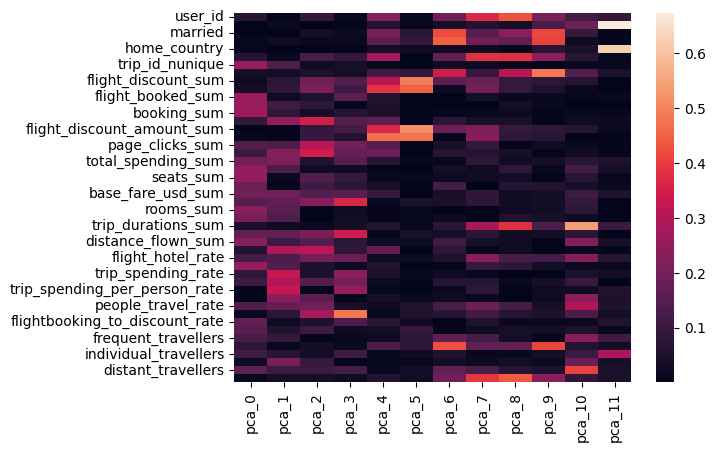

In [17]:
sns.heatmap(np.abs(component_matrix))

In [18]:
clients_pca = pca.fit_transform(metrics_data_scaled)
clients_pca.shape

(5998, 12)

In [19]:
clients_pca = pd.DataFrame(clients_pca)
clients_pca.index = metrics_data.index
clients_pca.columns = [f"pca_{i}"for i in range(clients_pca.shape[1])]
clients_pca

pca_0     pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  \
0    -0.876652 -0.374911 -0.634394 -0.818528 -1.497981  0.055927  0.011476   
1     1.921995 -0.702084 -1.901977 -0.402583 -1.217908  1.040673  0.215126   
2    -0.441452 -0.215614 -1.585867 -0.789084  0.335939 -0.227812  2.787553   
3     3.029910 -3.649055  0.562168  0.104162 -1.433834  1.715766 -1.947523   
4    -6.355475 -0.446908 -0.481263 -0.303992 -1.580393 -0.619651 -0.202421   
...        ...       ...       ...       ...       ...       ...       ...   
5993 -3.930884  0.861805 -1.356673  0.686150 -0.970670  0.579006  1.031361   
5994  1.877228 -1.368977  0.442989  0.088262 -0.285032 -0.158684 -0.784213   
5995 -0.430648 -1.124410 -0.779437 -0.210112 -0.149080 -0.034546  1.027554   
5996 -1.747459  0.223861 -1.912412 -0.010947 -1.637341  0.397573 -0.432341   
5997 -6.255931 -0.397679 -0.394111 -0.541878 -0.456409 -1.662335  1.094594   

         pca_7     pca_8     pca_9    pca_10    pca_11  
0     3.155412  1.994529  0.568994  2.241211  2.357990  
1     0.260878 -1.339976  0.375865 -0.468460  0.069869  
2     0.501328  0.792722 -2.717556 -1.532631  0.054856  
3     0.468433 -1.520923 -1.062310  0.235636 -0.515446  
4    -1.916755  0.666580 -1.738216  0.678279  2.400050  
...        ...       ...       ...       ...       ...  
5993 -0.227952 -1.335488  1.673121  0.303503 -0.857724  
5994  0.396971 -1.069623 -0.142883 -0.499890  0.094259  
5995  0.137781 -0.908590 -0.991662 -0.526791  0.125843  
5996  0.509723 -0.397301 -0.048889 -0.719984  0.120532  
5997 -0.901296 -1.646336  0.654835  1.793636 -1.568744  

[5998 rows x 12 columns]

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [21]:
scores = []
for n_clusters in range(2,20):
  kmeans = KMeans(n_clusters=n_clusters)
  clusters = kmeans.fit_predict(clients_pca)
  scores.append(silhouette_score(clients_pca,clusters))

[0.21764685001216524,
 0.15564935358093063,
 0.16515401854400258,
 0.13064830044956663,
 0.13079698933006018,
 0.10978820435593803,
 0.1343722511669,
 0.1327020443228084,
 0.11614855252812042,
 0.1311551233585005,
 0.10873740621083172,
 0.1275362796751505,
 0.1286285854254939,
 0.1227935929482084,
 0.11076511630344704,
 0.11415924753463579,
 0.13177630301976415,
 0.1262188435722319]

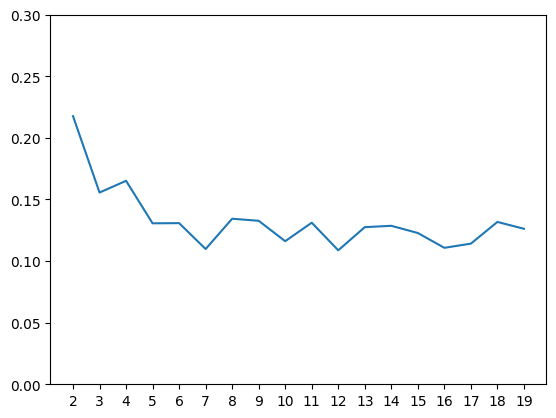

In [22]:
ax = sns.lineplot(x=range(2,20),y=scores)
ax.set_xticks(range(2,20))
ax.set_ylim(0,0.3)
scores

In [23]:
kmeans = KMeans(n_clusters=8, random_state=100)
clusters = kmeans.fit_predict(clients_pca)
labels=kmeans.cluster_centers_

labels


array([[ 3.20477122e+00, -9.54173554e-01, -7.37561877e-01,
         1.26233228e-01,  2.34748327e-01,  7.54993330e-02,
         5.02065897e-02, -7.91749362e-02, -1.14551224e-01,
        -2.32055301e-01, -2.19361481e-02,  6.46020994e-02],
       [-8.76108593e-01, -1.73869718e+00,  1.51408218e+00,
         1.90112922e+00,  1.45841383e-01,  1.45522227e-01,
         1.43076144e-01,  4.09814956e-01,  8.62100226e-02,
         2.02905233e-01, -5.27201549e-01,  1.50412013e-01],
       [-2.63627850e+00,  7.64361219e-01, -7.28629534e-01,
        -9.25156774e-02,  1.05452995e-01,  6.40643664e-02,
        -5.83056074e-02,  1.74522377e-01,  8.41162692e-02,
         7.81466359e-02, -2.01653162e-01, -2.82110910e-01],
       [ 2.36490463e-01, -3.84708506e-01, -7.68549139e-01,
        -4.02239329e-01, -1.00212918e-02,  5.48421109e-02,
         2.37972458e-01,  4.80449178e-01,  2.85269002e-01,
         2.16233846e-01, -2.26633519e-01,  1.00480083e-01],
       [ 2.58333462e+00,  2.78309189e+00,  3.7526458

In [24]:
clusters

array([3, 0, 3, ..., 3, 2, 7], dtype=int32)

In [25]:
clusters = pd.Series(clusters)
clusters.index = metrics_data.index
clusters.name = "group"
clusters

0       3
1       0
2       3
3       0
4       7
       ..
5993    2
5994    0
5995    3
5996    2
5997    7
Name: group, Length: 5998, dtype: int32

In [26]:
pd.crosstab(clusters,"count")

col_0  count
group       
0       1123
1        572
2       1273
3       1410
4        434
5        326
6        136
7        724

In [27]:
clients_viz = pd.concat([clients_pca,clusters],axis=1)
clients_viz

pca_0     pca_1     pca_2     pca_3     pca_4     pca_5     pca_6  \
0    -0.876652 -0.374911 -0.634394 -0.818528 -1.497981  0.055927  0.011476   
1     1.921995 -0.702084 -1.901977 -0.402583 -1.217908  1.040673  0.215126   
2    -0.441452 -0.215614 -1.585867 -0.789084  0.335939 -0.227812  2.787553   
3     3.029910 -3.649055  0.562168  0.104162 -1.433834  1.715766 -1.947523   
4    -6.355475 -0.446908 -0.481263 -0.303992 -1.580393 -0.619651 -0.202421   
...        ...       ...       ...       ...       ...       ...       ...   
5993 -3.930884  0.861805 -1.356673  0.686150 -0.970670  0.579006  1.031361   
5994  1.877228 -1.368977  0.442989  0.088262 -0.285032 -0.158684 -0.784213   
5995 -0.430648 -1.124410 -0.779437 -0.210112 -0.149080 -0.034546  1.027554   
5996 -1.747459  0.223861 -1.912412 -0.010947 -1.637341  0.397573 -0.432341   
5997 -6.255931 -0.397679 -0.394111 -0.541878 -0.456409 -1.662335  1.094594   

         pca_7     pca_8     pca_9    pca_10    pca_11  group  
0     3.155412  1.994529  0.568994  2.241211  2.357990      3  
1     0.260878 -1.339976  0.375865 -0.468460  0.069869      0  
2     0.501328  0.792722 -2.717556 -1.532631  0.054856      3  
3     0.468433 -1.520923 -1.062310  0.235636 -0.515446      0  
4    -1.916755  0.666580 -1.738216  0.678279  2.400050      7  
...        ...       ...       ...       ...       ...    ...  
5993 -0.227952 -1.335488  1.673121  0.303503 -0.857724      2  
5994  0.396971 -1.069623 -0.142883 -0.499890  0.094259      0  
5995  0.137781 -0.908590 -0.991662 -0.526791  0.125843      3  
5996  0.509723 -0.397301 -0.048889 -0.719984  0.120532      2  
5997 -0.901296 -1.646336  0.654835  1.793636 -1.568744      7  

[5998 rows x 13 columns]

<Axes: xlabel='pca_0', ylabel='pca_1'>

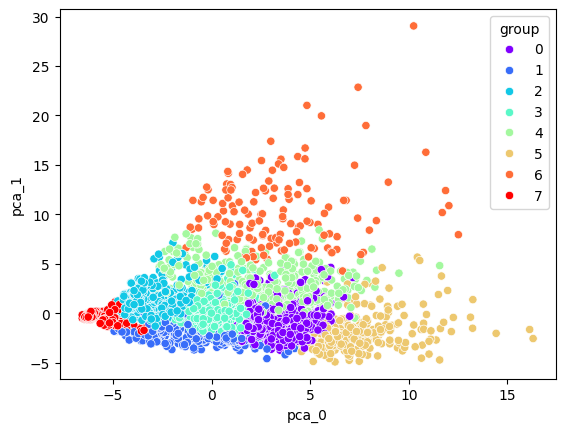

In [28]:
sns.scatterplot(data=clients_viz,x="pca_0",y="pca_1",hue="group",palette="rainbow",legend='full')

In [29]:
metrics_data["group"] = clusters
metrics_data

user_id  gender  married  has_children  home_country  \
0      637633     1.0      0.0           0.0           0.0   
1      637687     1.0      1.0           0.0           1.0   
2      638140     1.0      0.0           1.0           1.0   
3      638162     1.0      0.0           0.0           1.0   
4      638237     1.0      0.0           1.0           0.0   
...       ...     ...      ...           ...           ...   
5993   637075     1.0      1.0           0.0           1.0   
5994   637086     1.0      0.0           0.0           1.0   
5995   637421     1.0      1.0           1.0           1.0   
5996   637457     1.0      0.0           0.0           1.0   
5997   637555     0.0      1.0           0.0           1.0   

      session_id_nunique  trip_id_nunique  user_age_mean  flight_discount_sum  \
0                    8.0              3.0           37.0                    1   
1                    8.0              4.0           40.0                    2   
2                    8.0              2.0           39.0                    1   
3                    8.0              6.0           33.0                    3   
4                    9.0              0.0           24.0                    0   
...                  ...              ...            ...                  ...   
5993                 8.0              1.0           65.0                    1   
5994                 9.0              4.0           46.0                    2   
5995                 8.0              3.0           31.0                    1   
5996                 8.0              2.0           41.0                    1   
5997                 8.0              0.0           58.0                    0   

      hotel_discount_sum  ...  nights_travel_rate  \
0                      1  ...            1.666667   
1                      0  ...            1.500000   
2                      2  ...            3.000000   
3                      0  ...            3.166667   
4                      0  ...            0.000000   
...                  ...  ...                 ...   
5993                   0  ...            3.000000   
5994                   1  ...            3.000000   
5995                   1  ...            2.000000   
5996                   0  ...            2.000000   
5997                   2  ...            0.000000   

      flightbooking_to_discount_rate  hotelbooking_to_discount_rate  \
0                                2.0                            2.0   
1                                2.0                            0.0   
2                                2.0                            1.0   
3                                1.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
5993                             1.0                            0.0   
5994                             1.5                            4.0   
5995                             2.0                            3.0   
5996                             2.0                            0.0   
5997                             0.0                            0.0   

      frequent_travellers  travellers_with_children  individual_travellers  \
0                     0.0                       0.0                    0.0   
1                     0.0                       0.0                    0.0   
2                     0.0                       1.0                    0.0   
3                     1.0                       0.0                    0.0   
4                     0.0                       0.0                    0.0   
...                   ...                       ...                    ...   
5993                  0.0                       0.0                    1.0   
5994                  0.0                       0.0                    0.0   
5995                  0.0                       0.0                    0.0   
5996              

In [30]:
pd.crosstab(metrics_data["group"],metrics_data["gender"])

gender  0.0   1.0
group            
0       122  1001
1        43   529
2       171  1102
3       163  1247
4        60   374
5        40   286
6        23   113
7        84   640

In [31]:
pd.crosstab(metrics_data["group"],[metrics_data["gender"],metrics_data["has_children"]])

gender        0.0      1.0     
has_children  0.0 1.0  0.0  1.0
group                          
0              89  33  676  325
1              30  13  351  178
2              98  73  682  420
3             106  57  887  360
4              45  15  248  126
5              33   7  234   52
6               9  14   69   44
7              48  36  435  205

In [32]:
metrics_data.loc[metrics_data["group"]==2,:].describe()

user_id       gender      married  has_children  home_country  \
count    1273.000000  1273.000000  1273.000000   1273.000000   1273.000000   
mean   558826.562451     0.865672     0.457188      0.387274      0.851532   
std     56393.087102     0.341139     0.498360      0.487319      0.355703   
min    133058.000000     0.000000     0.000000      0.000000      0.000000   
25%    522944.000000     1.000000     0.000000      0.000000      1.000000   
50%    547857.000000     1.000000     0.000000      0.000000      1.000000   
75%    584531.000000     1.000000     1.000000      1.000000      1.000000   
max    811077.000000     1.000000     1.000000      1.000000      1.000000   

       session_id_nunique  trip_id_nunique  user_age_mean  \
count         1273.000000      1273.000000    1273.000000   
mean             8.286724         1.619010      41.216811   
std              0.608086         0.495435      12.217119   
min              8.000000         1.000000      18.000000   
25%              8.000000         1.000000      33.000000   
50%              8.000000         2.000000      42.000000   
75%              8.000000         2.000000      50.000000   
max             13.000000         3.000000      82.000000   

       flight_discount_sum  hotel_discount_sum  ...  nights_travel_rate  \
count          1273.000000         1273.000000  ...         1273.000000   
mean              1.490966            1.008641  ...            2.361482   
std               1.103933            0.942074  ...            1.869466   
min               0.000000            0.000000  ...            0.000000   
25%               1.000000            0.000000  ...            1.000000   
50%               1.000000            1.000000  ...            2.000000   
75%               2.000000            2.000000  ...            3.000000   
max               6.000000            4.000000  ...           15.000000   

       flightbooking_to_discount_rate  hotelbooking_to_discount_rate  \
count                     1273.000000                    1273.000000   
mean                         0.769102                       0.686043   
std                          0.618339                       0.699332   
min                          0.000000                       0.000000   
25%                          0.333333                       0.000000   
50%                          0.666667                       0.500000   
75%                          1.000000                       1.000000   
max                          2.000000                       3.000000   

       frequent_travellers  travellers_with_children  individual_travellers  \
count               1273.0               1273.000000            1273.000000   
mean                   0.0                  0.001571               0.347211   
std                    0.0                  0.039621               0.476271   
min                    0.0                  0.000000               0.000000   
25%                    0.0                  0.000000               0.000000   
50%                    0.0                  0.000000               0.000000   
75%                    0.0                  0.000000               1.000000   
max                    0.0                  1.000000               1.000000   

       luxury_travellers  distant_travellers  backpackers_travellers   group  
count        1273.000000         1273.000000             1273.000000  1273.0  
mean            0.011783            0.017282                0.075412     2.0  
std             0.107951            0.130371                0.264159     0.0  
min             0.000000            0.000000                0.000000     2.0  
25%             0.000000            0.000000                0.000000     2.0  
50%             0.000000            0.000000                0.000000     2.0  
75%             0.000000            0.000000                0.000000     2.0  
max             1.000000            1.000000                1.000000     2.0  

[8 rows x 4

In [33]:
metrics_data

user_id  gender  married  has_children  home_country  \
0      637633     1.0      0.0           0.0           0.0   
1      637687     1.0      1.0           0.0           1.0   
2      638140     1.0      0.0           1.0           1.0   
3      638162     1.0      0.0           0.0           1.0   
4      638237     1.0      0.0           1.0           0.0   
...       ...     ...      ...           ...           ...   
5993   637075     1.0      1.0           0.0           1.0   
5994   637086     1.0      0.0           0.0           1.0   
5995   637421     1.0      1.0           1.0           1.0   
5996   637457     1.0      0.0           0.0           1.0   
5997   637555     0.0      1.0           0.0           1.0   

      session_id_nunique  trip_id_nunique  user_age_mean  flight_discount_sum  \
0                    8.0              3.0           37.0                    1   
1                    8.0              4.0           40.0                    2   
2                    8.0              2.0           39.0                    1   
3                    8.0              6.0           33.0                    3   
4                    9.0              0.0           24.0                    0   
...                  ...              ...            ...                  ...   
5993                 8.0              1.0           65.0                    1   
5994                 9.0              4.0           46.0                    2   
5995                 8.0              3.0           31.0                    1   
5996                 8.0              2.0           41.0                    1   
5997                 8.0              0.0           58.0                    0   

      hotel_discount_sum  ...  nights_travel_rate  \
0                      1  ...            1.666667   
1                      0  ...            1.500000   
2                      2  ...            3.000000   
3                      0  ...            3.166667   
4                      0  ...            0.000000   
...                  ...  ...                 ...   
5993                   0  ...            3.000000   
5994                   1  ...            3.000000   
5995                   1  ...            2.000000   
5996                   0  ...            2.000000   
5997                   2  ...            0.000000   

      flightbooking_to_discount_rate  hotelbooking_to_discount_rate  \
0                                2.0                            2.0   
1                                2.0                            0.0   
2                                2.0                            1.0   
3                                1.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
5993                             1.0                            0.0   
5994                             1.5                            4.0   
5995                             2.0                            3.0   
5996                             2.0                            0.0   
5997                             0.0                            0.0   

      frequent_travellers  travellers_with_children  individual_travellers  \
0                     0.0                       0.0                    0.0   
1                     0.0                       0.0                    0.0   
2                     0.0                       1.0                    0.0   
3                     1.0                       0.0                    0.0   
4                     0.0                       0.0                    0.0   
...                   ...                       ...                    ...   
5993                  0.0                       0.0                    1.0   
5994                  0.0                       0.0                    0.0   
5995                  0.0                       0.0                    0.0   
5996              

In [34]:
metrics_data[metrics_data['group'] == 0].describe()

user_id       gender      married  has_children  home_country  \
count    1123.000000  1123.000000  1123.000000   1123.000000   1123.000000   
mean   534854.242208     0.891362     0.454141      0.318789      0.825467   
std     58545.041535     0.311323     0.498114      0.466215      0.379736   
min    175032.000000     0.000000     0.000000      0.000000      0.000000   
25%    512700.500000     1.000000     0.000000      0.000000      1.000000   
50%    532989.000000     1.000000     0.000000      0.000000      1.000000   
75%    564043.000000     1.000000     1.000000      1.000000      1.000000   
max    732729.000000     1.000000     1.000000      1.000000      1.000000   

       session_id_nunique  trip_id_nunique  user_age_mean  \
count         1123.000000      1123.000000    1123.000000   
mean             8.540516         4.387355      44.308994   
std              0.876971         0.617987       7.315879   
min              8.000000         2.000000      19.000000   
25%              8.000000         4.000000      39.000000   
50%              8.000000         4.000000      44.000000   
75%              9.000000         5.000000      49.000000   
max             14.000000         6.000000      65.000000   

       flight_discount_sum  hotel_discount_sum  ...  nights_travel_rate  \
count          1123.000000         1123.000000  ...         1123.000000   
mean              1.432769            1.116652  ...            3.023568   
std               1.086981            1.014915  ...            1.524835   
min               0.000000            0.000000  ...            0.250000   
25%               1.000000            0.000000  ...            2.000000   
50%               1.000000            1.000000  ...            2.750000   
75%               2.000000            2.000000  ...            3.800000   
max               5.000000            6.000000  ...           11.000000   

       flightbooking_to_discount_rate  hotelbooking_to_discount_rate  \
count                     1123.000000                    1123.000000   
mean                         2.206456                       2.040398   
std                          1.584519                       1.725686   
min                          0.000000                       0.000000   
25%                          1.000000                       0.000000   
50%                          2.000000                       2.000000   
75%                          4.000000                       4.000000   
max                          6.000000                       5.000000   

       frequent_travellers  travellers_with_children  individual_travellers  \
count          1123.000000               1123.000000                 1123.0   
mean              0.008905                  0.237756                    0.0   
std               0.093986                  0.425899                    0.0   
min               0.000000                  0.000000                    0.0   
25%               0.000000                  0.000000                    0.0   
50%               0.000000                  0.000000                    0.0   
75%               0.000000                  0.000000                    0.0   
max               1.000000                  1.000000                    0.0   

       luxury_travellers  distant_travellers  backpackers_travellers   group  
count        1123.000000         1123.000000             1123.000000  1123.0  
mean            0.016919            0.455031                0.008905     0.0  
std             0.129025            0.498196                0.093986     0.0  
min             0.000000            0.000000                0.000000     0.0  
25%             0.000000            0.000000                0.000000     0.0  
50%             0.000000            0.000000                0.000000     0.0  
75%             0.000000            1.000000                0.000000     0.0  
max             1.000000            1.000000                1.000000     0.0  

[8 rows x 4

In [35]:
metrics_data.columns

Index(['user_id', 'gender', 'married', 'has_children', 'home_country',
       'session_id_nunique', 'trip_id_nunique', 'user_age_mean',
       'flight_discount_sum', 'hotel_discount_sum', 'flight_booked_sum',
       'hotel_booked_sum', 'booking_sum', 'cancellation_sum',
       'flight_discount_amount_sum', 'hotel_discount_amount_sum',
       'page_clicks_sum', 'session_durations_sum', 'total_spending_sum',
       'return_flight_booked_sum', 'seats_sum', 'checked_bags_sum',
       'base_fare_usd_sum', 'nights_sum', 'rooms_sum',
       'hotel_per_room_usd_sum', 'trip_durations_sum', 'hotel_durations_sum',
       'distance_flown_sum', 'cancellation_rate', 'flight_hotel_rate',
       'trip_session_rate', 'trip_spending_rate', 'trip_flown_rate',
       'trip_spending_per_person_rate', 'trip_spending_per_night_rate',
       'people_travel_rate', 'nights_travel_rate',
       'flightbooking_to_discount_rate', 'hotelbooking_to_discount_rate',
       'frequent_travellers', 'travellers_with_child

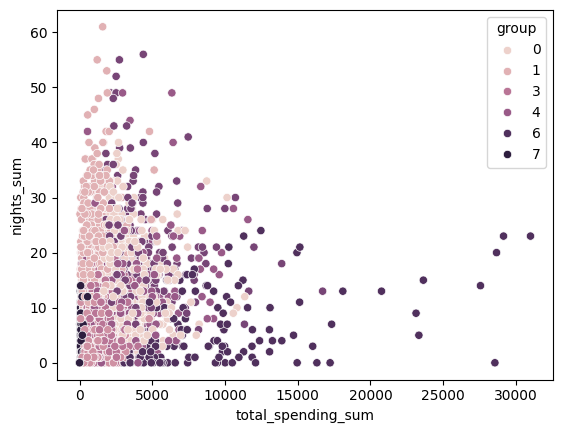

In [36]:
sns.scatterplot(data=metrics_data, x='total_spending_sum', y='nights_sum', hue='group')
plt.show()

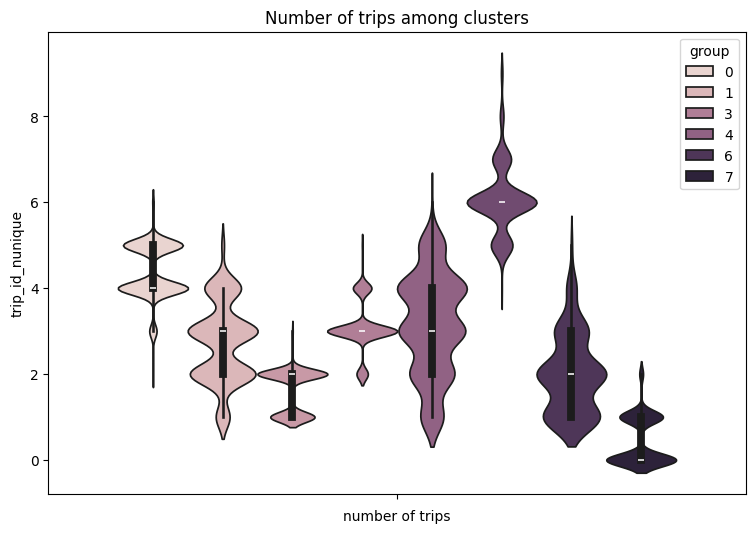

In [37]:
plt.figure(figsize=(9,6))
sns.violinplot(data=metrics_data, y="trip_id_nunique", hue="group")
plt.title('Number of trips among clusters')
plt.xlabel('number of trips')
plt.show()

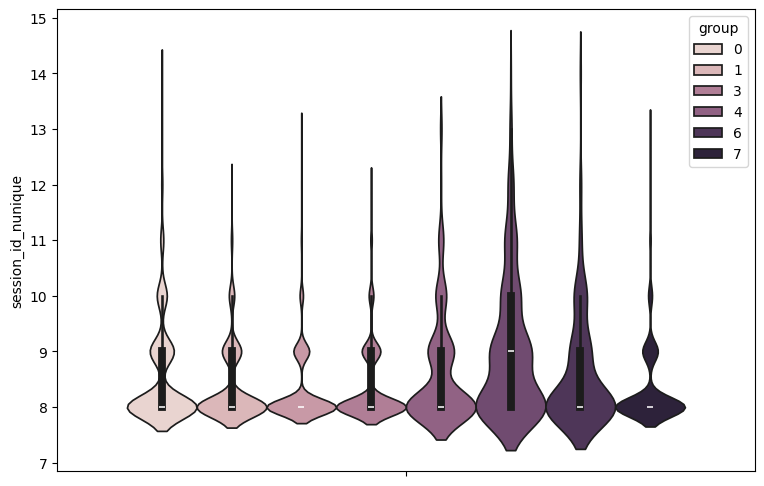

In [38]:
plt.figure(figsize=(9,6))
sns.violinplot(data=metrics_data, y="session_id_nunique", hue="group")
plt.show()

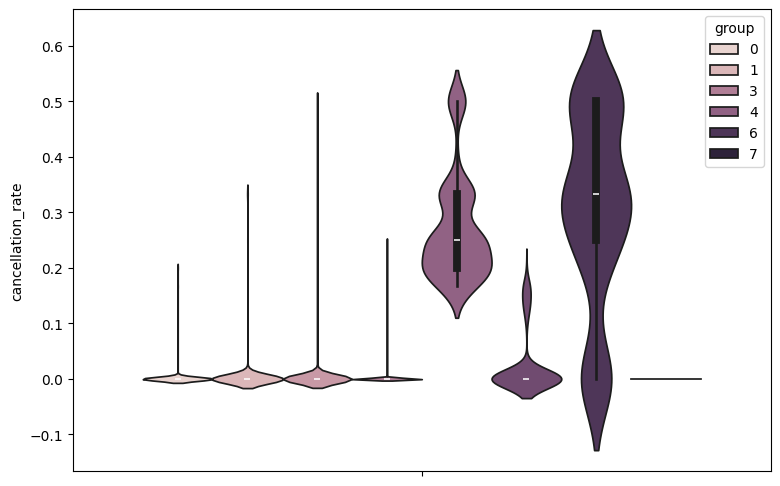

In [39]:
plt.figure(figsize=(9,6))
sns.violinplot(data=metrics_data, y="cancellation_rate", hue="group")
plt.show()

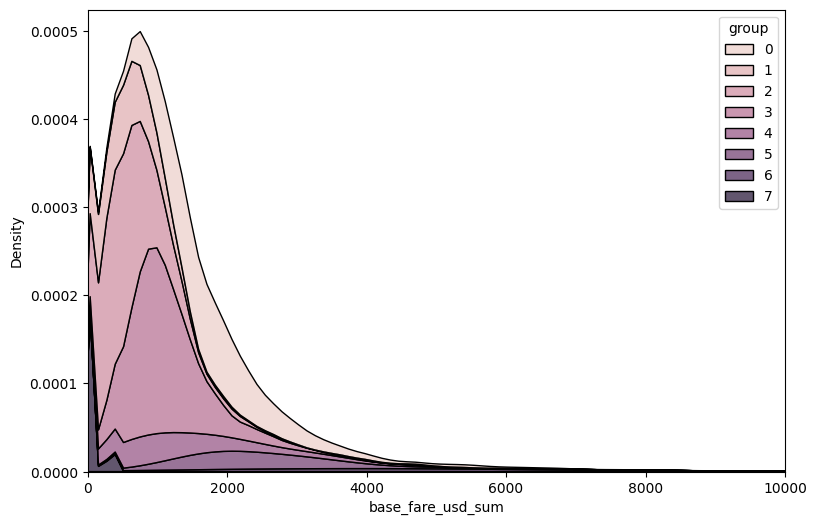

In [40]:
plt.figure(figsize=(9,6))
sns.kdeplot(data=metrics_data, x="base_fare_usd_sum", hue="group", multiple="stack")
plt.xlim(0, 10000)
plt.show()

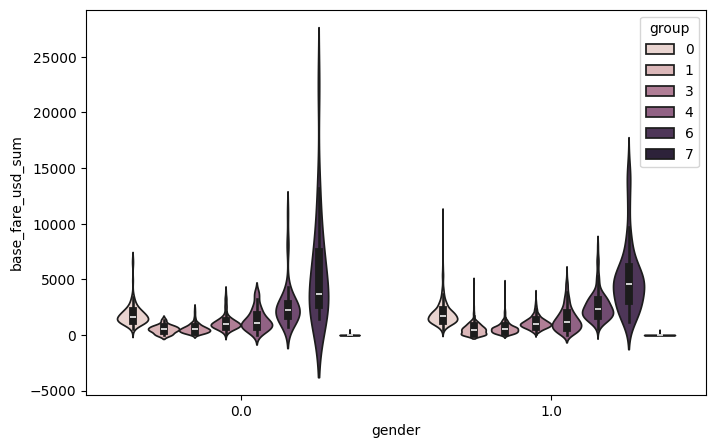

In [41]:
#sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(8,5))
sns.violinplot(data=metrics_data, x='gender', y="base_fare_usd_sum", hue="group")
plt.show()

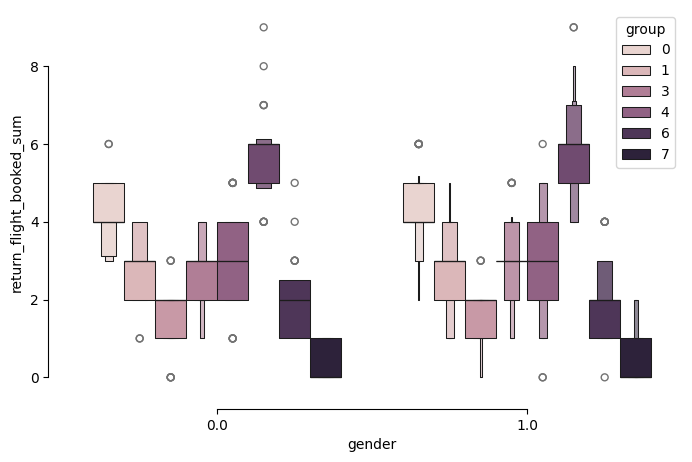

In [42]:
plt.figure(figsize=(8,5))
sns.boxenplot(data=metrics_data, x='gender', y="return_flight_booked_sum", hue="group")
sns.despine(offset=10, trim=True)
plt.show()

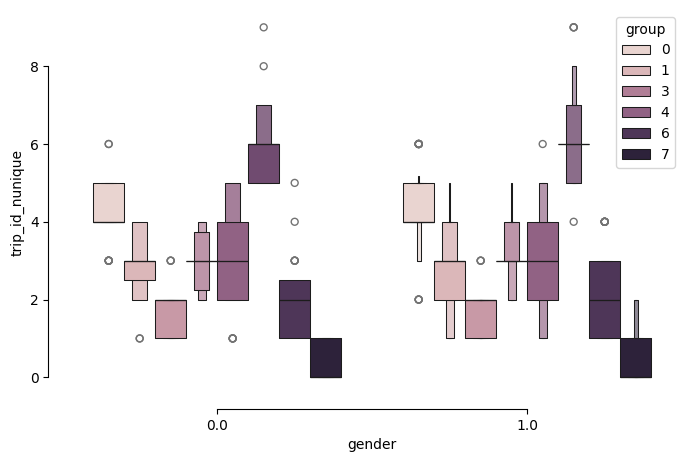

In [43]:
plt.figure(figsize=(8,5))
sns.boxenplot(data=metrics_data, x='gender', y="trip_id_nunique", hue="group")
sns.despine(offset=10, trim=True)
plt.show()

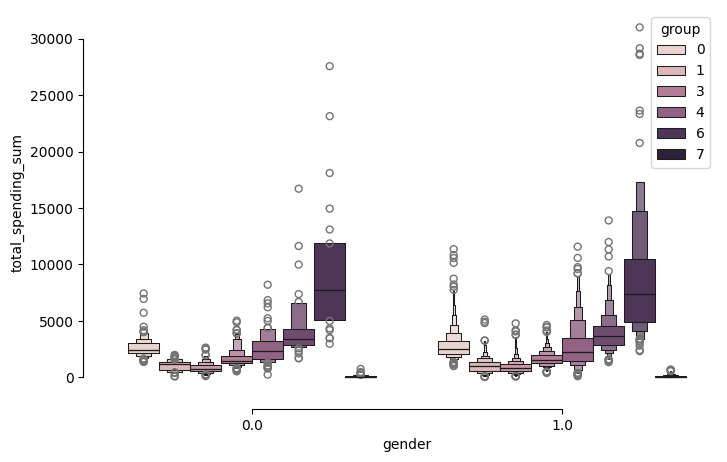

In [44]:
plt.figure(figsize=(8,5))
sns.boxenplot(data=metrics_data, x='gender', y="total_spending_sum", hue="group")
sns.despine(offset=10, trim=True)
plt.show()

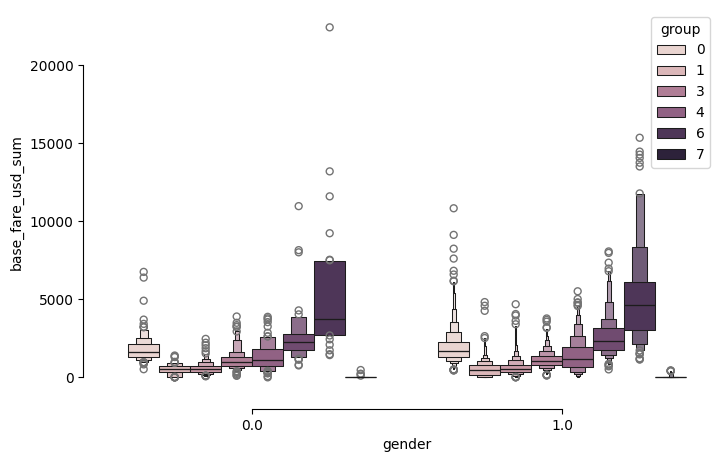

In [45]:

plt.figure(figsize=(8,5))
sns.boxenplot(data=metrics_data, x='gender', y="base_fare_usd_sum", hue="group")
sns.despine(offset=10, trim=True)
plt.show()

In [46]:

fig = px.violin(metrics_data, y="base_fare_usd_sum", x="group", color="gender", box=True, points="all", hover_data=metrics_data.columns)
fig.show()

In [47]:
from dash import Dash, dcc, html, Input, Output

In [48]:
app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        metrics_data['group'].min(),
        metrics_data['group'].max(),
        step=None,
        value=metrics_data['group'].min(),
        marks={str(group): str(group) for group in metrics_data['group'].unique()},
        id='group-slider'
    )
])

In [49]:
@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('group-slider', 'value'))
def update_figure(selected_group):
    filtered_metrics_data = metrics_data[metrics_data.group == selected_group]

    fig = px.scatter_matrix(filtered_metrics_data, dimensions=['nights_sum', 'flight_booked_sum', 
                            'hotel_booked_sum'], size_max=60)

    return fig

In [50]:
if __name__ == '__main__':
    app.run_server(debug=True)

In [55]:
metrics_data.columns


Index(['user_id', 'gender', 'married', 'has_children', 'home_country',
       'session_id_nunique', 'trip_id_nunique', 'user_age_mean',
       'flight_discount_sum', 'hotel_discount_sum', 'flight_booked_sum',
       'hotel_booked_sum', 'booking_sum', 'cancellation_sum',
       'flight_discount_amount_sum', 'hotel_discount_amount_sum',
       'page_clicks_sum', 'session_durations_sum', 'total_spending_sum',
       'return_flight_booked_sum', 'seats_sum', 'checked_bags_sum',
       'base_fare_usd_sum', 'nights_sum', 'rooms_sum',
       'hotel_per_room_usd_sum', 'trip_durations_sum', 'hotel_durations_sum',
       'distance_flown_sum', 'cancellation_rate', 'flight_hotel_rate',
       'trip_session_rate', 'trip_spending_rate', 'trip_flown_rate',
       'trip_spending_per_person_rate', 'trip_spending_per_night_rate',
       'people_travel_rate', 'nights_travel_rate',
       'flightbooking_to_discount_rate', 'hotelbooking_to_discount_rate',
       'frequent_travellers', 'travellers_with_child

In [54]:
for i in range(8):
    print(f'Group {i}')
    print(f'Number of clients: {len(metrics_data[metrics_data["group"] == i])}')
    print(f'Median of Trips = {metrics_data["trip_id_nunique"][metrics_data["group"] == i].median()}')
    print(f'Mean of Customer With Children = {metrics_data["has_children"][metrics_data["group"] == i].mean()}')
    print(f'Mean of Flight Discount = {metrics_data["flight_discount_sum"][metrics_data["group"] == i].mean()}')
    print(f'Mean of Hotel Discount = {metrics_data["hotel_discount_sum"][metrics_data["group"] == i].mean()}')
    print(f'Median of Flights = {metrics_data["flight_booked_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Hotels = {metrics_data["hotel_booked_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Hotel Spend = {metrics_data["hotel_per_room_usd_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Flight Spend = {metrics_data["base_fare_usd_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Flight and Hotel Spend = {metrics_data["total_spending_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of KM Flown = {metrics_data["distance_flown_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Flight Seat = {metrics_data["seats_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Hotel Rooms = {metrics_data["rooms_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Hotel nights = {metrics_data["nights_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Trip Duration = {metrics_data["trip_durations_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Checked Bags = {metrics_data["checked_bags_sum"][metrics_data["group"] == i].median()}')
    print(f'Mean of Trip Distance Rate = {metrics_data["trip_flown_rate"][metrics_data["group"] == i].median()}')
    print(f'Mean of Spending Per Distance Per Person  = {metrics_data["trip_spending_per_person_rate"][metrics_data["group"] == i].median()}')
    print(f'Mean of Spending Per Distance Per Night = {metrics_data["trip_spending_per_night_rate"][metrics_data["group"] == i].median()}')
    print(f'Mean of People Travelled Per Trip  = {metrics_data["people_travel_rate"][metrics_data["group"] == i].median()}')
    print(f'Mean of Hotel Booking Per Discount = {metrics_data["hotelbooking_to_discount_rate"][metrics_data["group"] == i].median()}')
    print(f'Mean of Flight Booking Per Discount = {metrics_data["flightbooking_to_discount_rate"][metrics_data["group"] == i].median()}')
    print(f'Median of Age = {metrics_data["user_age_mean"][metrics_data["group"] == i].median()}')
    print(f'Median of Sessions = {metrics_data["session_id_nunique"][metrics_data["group"] == i].median()}')
    print(f'Median of Cancellation = {metrics_data["cancellation_sum"][metrics_data["group"] == i].median()}')
    print(f'Median of Cancellation Rate = {metrics_data["cancellation_rate"][metrics_data["group"] == i].median()}')
    print('--------------------------')

Group 0
Number of clients: 1123
Median of Trips = 4.0
Mean of Customer With Children = 0.3187889581478183
Mean of Flight Discount = 1.4327693677649154
Mean of Hotel Discount = 1.1166518254674977
Median of Flights = 4.0
Median of Hotels = 4.0
Median of Hotel Spend = 691.0
Median of Flight Spend = 1692.54
Median of Flight and Hotel Spend = 2519.0
Median of KM Flown = 8393.56903517801
Median of Flight Seat = 5.0
Median of Hotel Rooms = 5.0
Median of Hotel nights = 12.0
Median of Trip Duration = 1468800000000000.0
Median of Checked Bags = 2.0
Mean of Trip Distance Rate = 1919.8724378185152
Mean of Spending Per Distance Per Person  = 127.0645
Mean of Spending Per Distance Per Night = 48.27895833333333
Mean of People Travelled Per Trip  = 1.0
Mean of Hotel Booking Per Discount = 2.0
Mean of Flight Booking Per Discount = 2.0
Median of Age = 44.0
Median of Sessions = 8.0
Median of Cancellation = 0.0
Median of Cancellation Rate = 0.0
--------------------------
Group 1
Number of clients: 572
Med

In [60]:
grouped_metrics_columns = {'gender':['sum'], 'married':['sum'], 'has_children':['sum'], 'home_country':['sum'],
       'session_id_nunique':['median'], 'trip_id_nunique':['median'], 'user_age_mean':['median'],
       'flight_discount_sum':['median'], 'hotel_discount_sum':['median'], 'flight_booked_sum':['median'],
       'hotel_booked_sum':['median'], 'booking_sum':['median'], 'cancellation_sum':['median'],
       'flight_discount_amount_sum':['median'], 'hotel_discount_amount_sum':['median'],
       'page_clicks_sum':['median'], 'session_durations_sum':['median'], 'total_spending_sum':['median'],
       'return_flight_booked_sum':['median'], 'seats_sum':['median'], 'checked_bags_sum':['median'],
       'base_fare_usd_sum':['median'], 'nights_sum':['median'], 'rooms_sum':['median'],
       'hotel_per_room_usd_sum':['median'], 'trip_durations_sum':['median'], 'hotel_durations_sum':['median'],
       'distance_flown_sum':['median'], 'cancellation_rate':['median'], 'flight_hotel_rate':['median'],
       'trip_session_rate':['median'], 'trip_spending_rate':['median'], 'trip_flown_rate':['median'],
       'trip_spending_per_person_rate':['median'], 'trip_spending_per_night_rate':['median'],
       'people_travel_rate':['median'], 'nights_travel_rate':['median'],
       'flightbooking_to_discount_rate':['median'], 'hotelbooking_to_discount_rate':['median'],
       'frequent_travellers':['median'], 'travellers_with_children':['median']}
grouped_metrics = metrics_data.groupby('group').agg(grouped_metrics_columns)

# flatten MultiIndex columns
grouped_metrics.columns = ['_'.join(col) for col in grouped_metrics.columns.values]

grouped_metrics

gender_sum  married_sum  has_children_sum  home_country_sum  \
group                                                                
0          1001.0        510.0             358.0             927.0   
1           529.0        261.0             191.0             479.0   
2          1102.0        582.0             493.0            1084.0   
3          1247.0        631.0             417.0            1158.0   
4           374.0        173.0             141.0             358.0   
5           286.0        119.0              59.0             263.0   
6           113.0         74.0              58.0             109.0   
7           640.0        292.0             241.0             613.0   

       session_id_nunique_median  trip_id_nunique_median  \
group                                                      
0                            8.0                     4.0   
1                            8.0                     3.0   
2                            8.0                     2.0   
3                            8.0                     3.0   
4                            8.0                     3.0   
5                            9.0                     6.0   
6                            8.0                     2.0   
7                            8.0                     0.0   

       user_age_mean_median  flight_discount_sum_median  \
group                                                     
0                      44.0                         1.0   
1                      41.0                         1.0   
2                      42.0                         1.0   
3                      44.0                         1.0   
4                      43.0                         2.0   
5                      43.5                         1.0   
6                      40.5                         2.0   
7                      33.0                         1.0   

       hotel_discount_sum_median  flight_booked_sum_median  ...  \
group                                                       ...   
0                            1.0                       4.0  ...   
1                            1.0                       1.0  ...   
2                            1.0                       1.0  ...   
3                            1.0                       3.0  ...   
4                            2.0                       4.0  ...   
5                            1.0                       6.0  ...   
6                            2.0                       3.0  ...   
7                            1.0                       0.0  ...   

       people_travel_rate_median  nights_travel_rate_median  \
group                                                         
0                            1.0                   2.750000   
1                            0.5                   6.500000   
2                            1.0                   2.000000   
3                            1.0                   2.333333   
4                            1.0                   2.750000   
5                            1.0                   2.833333   
6                            1.5                   1.500000   
7                            0.0                   0.000000   

       flightbooking_to_discount_rate_median  \
group                                          
0                                   2.000000   
1                                   0.500000   
2                                   0.666667   
3                                   1.500000   
4                                   1.500000   
5                                   3.000000   
6                                   1.000000   
7                                   0.000000   

       hotelbooking_to_discount_rate_median  frequent_travellers_median  \
group                                                                     
0                                       2.0                         0.0   
1                                       1.5                         0.0   
2                              

In [ ]:
grouped_metrics_columns = {'session_id_nunique':['median'], 'trip_id_nunique':['median'], 'user_age_mean':['median'],
       'flight_discount_sum':['median'], 'hotel_discount_sum':['median'], 'flight_booked_sum':['median'],
       'hotel_booked_sum':['median'], 'booking_sum':['median'],
       'flight_discount_amount_sum':['median'], 'hotel_discount_amount_sum':['median'],
       'return_flight_booked_sum':['median'], 'seats_sum':['median'], 'checked_bags_sum':['median'],
       'base_fare_usd_sum':['median'], 'nights_sum':['median'], 'rooms_sum':['median'],
       'hotel_per_room_usd_sum':['median'], 'trip_durations_sum':['median'], 'hotel_durations_sum':['median'],
       'distance_flown_sum':['median'], 'cancellation_rate':['median'], 'flight_hotel_rate':['median'],
       'trip_session_rate':['median'], 'trip_spending_rate':['median'], 'trip_flown_rate':['median'],
       'trip_spending_per_person_rate':['median'], 'trip_spending_per_night_rate':['median'],
       'people_travel_rate':['median'], 'nights_travel_rate':['median'],
       'flightbooking_to_discount_rate':['median'], 'hotelbooking_to_discount_rate':['median']}
grouped_metrics = metrics_data.groupby('group').agg(grouped_metrics_columns)

# flatten MultiIndex columns
grouped_metrics.columns = ['_'.join(col) for col in grouped_metrics.columns.values]

grouped_metrics

In [59]:
grouped_metrics.T.to_csv('final_grouped_metrics')

In [ ]:
'''
Group 6 = Top Clients - Free Hotel Night with Flight
Group 2, 3, 4 = High Level Clients - 10% Flight Discount
Group 5, 6, 7 = Mid Clients - 10% Hotel Discount
Group 0 = Low Clients - Free Hotel Meal or Free Bag
'''

'\nGroup 6 = Top Clients - Free Hotel Night with Flight\nGroup 2, 3, 4 = High Level Clients - 10% Flight Discount\nGroup 5, 6, 7 = Mid Clients - 10% Hotel Discount\nGroup 0 = Low Clients - Free Hotel Meal or Free Bag\n'

In [ ]:
def categorize_group(group):
    if group in [1]:
        return 'Free Hotel Night with Flight'
    elif group in [2, 3, 4]:
        return '10% Flight Discount'
    elif group in [5, 6, 7]:
        return '10% Hotel Discount'
    else:
        return 'Free Hotel Meal or Free Bag'

In [ ]:
metrics_data['perk'] = metrics_data['group'].apply(categorize_group)

In [ ]:
metrics_data.head(10)

user_id  gender  married  has_children  home_country  session_id_nunique  \
0   596732     1.0      1.0           1.0           1.0                 8.0   
1   596820     1.0      0.0           0.0           1.0                 8.0   
2   596856     1.0      0.0           1.0           0.0                 8.0   
3   596863     1.0      1.0           1.0           1.0                 8.0   
4   597003     1.0      1.0           0.0           1.0                 9.0   
5   597010     1.0      1.0           0.0           0.0                 8.0   
6   597029     1.0      1.0           0.0           0.0                 8.0   
7   597300     1.0      1.0           1.0           1.0                 8.0   
8   597410     0.0      0.0           0.0           1.0                 8.0   
9   597434     1.0      0.0           0.0           1.0                 8.0   

   trip_id_nunique  user_age_mean  flight_discount_sum  hotel_discount_sum  \
0              3.0           47.0                    1                   0   
1              1.0           37.0                    3                   0   
2              3.0           30.0                    2                   1   
3              3.0           39.0                    1                   1   
4              2.0           44.0                    1                   0   
5              4.0           40.0                    2                   1   
6              5.0           40.0                    1                   1   
7              2.0           37.0                    4                   0   
8              3.0           48.0                    2                   0   
9              4.0           41.0                    1                   2   

   ...  cancellation_rate  flight_hotel_rate  frequent_travellers  \
0  ...               0.00           1.000000                  0.0   
1  ...               0.00           1.000000                  0.0   
2  ...               0.00           0.333333                  0.0   
3  ...               0.25           0.750000                  0.0   
4  ...               0.00           1.000000                  0.0   
5  ...               0.00           1.333333                  0.0   
6  ...               0.00           1.000000                  0.0   
7  ...               0.00           1.000000                  0.0   
8  ...               0.00           0.666667                  0.0   
9  ...               0.20           1.666667                  0.0   

   travellers_with_children  individual_travellers  luxury_travellers  \
0                       0.0                    0.0                0.0   
1                       0.0                    1.0                0.0   
2                       0.0                    0.0                0.0   
3                       1.0                    0.0                0.0   
4                       0.0                    0.0                0.0   
5                       0.0                    0.0                0.0   
6                       0.0                    0.0                0.0   
7                       0.0                    0.0                0.0   
8                       0.0                    0.0                0.0   
9                       0.0                    0.0                0.0   

   distant_travellers  backpackers_travellers  group  \
0                 0.0                     0.0      1   
1                 0.0                     0.0      7   
2                 0.0                     0.0      1   
3                 0.0                     0.0      0   
4                 0.0                     0.0      1   
5                 0.0                     0.0      3   
6                 0.0                     0.0      3   
7                 0.0                     1.0      5   
8                 0.0                     0.0      1   
9                 1.0                     0.0      0   

                           perk  
0  Free Hotel Night with Flight  
1            10% Hotel Di

In [ ]:
metrics_data['perk'].value_counts()

perk
10% Flight Discount             2195
10% Hotel Discount              1697
Free Hotel Night with Flight    1665
Free Hotel Meal or Free Bag      441
Name: count, dtype: int64

In [ ]:
def assign_perk(dataframe):
    if metrics_data['trip_id_unique'] > 4 and metrics_data['total_spending_sum'] > 2000:
        return 'Free Hotel Night with Flight'
    elif metrics_data['trip_id_unique'] > 4 and metrics_data['total_spending_sum'] < 1500:
        return 'Free Hotel Night'
    elif metrics_data['trip_id_nunique'] < 2 and metrics_data['cancellation_rate'] < 0.5:
        return 'Free Hotel Meals'
    else:
      return 'you get nothing'

In [ ]:
metrics_data.checked_bags_sum.mean()

1.3941313771257087

In [ ]:
metrics_data.columns

Index(['user_id', 'gender', 'married', 'has_children', 'home_country',
       'session_id_nunique', 'trip_id_nunique', 'user_age_mean',
       'flight_discount_sum', 'hotel_discount_sum', 'flight_booked_sum',
       'hotel_booked_sum', 'booking_sum', 'cancellation_sum',
       'flight_discount_amount_sum', 'hotel_discount_amount_sum',
       'page_clicks_sum', 'session_durations_sum', 'total_spending_sum',
       'return_flight_booked_sum', 'seats_sum', 'checked_bags_sum',
       'base_fare_usd_sum', 'nights_sum', 'rooms_sum',
       'hotel_per_room_usd_sum', 'trip_durations_sum', 'hotel_durations_sum',
       'distance_flown_sum', 'trip_session_rate', 'avg_trip_spending',
       'avg_trip_length', 'avg_people_traveled', 'cancellation_rate',
       'flight_hotel_rate', 'frequent_travellers', 'travellers_with_children',
       'individual_travellers', 'luxury_travellers', 'distant_travellers',
       'backpackers_travellers', 'group', 'perk'],
      dtype='object')

flights_hotels_columns = {'trip_id_nunique':['sum'],
     "seats_sum":['sum'],"checked_bags_sum":['sum'],"base_fare_usd_sum":['sum'],
      "nights":['sum'],"rooms":['sum'],"hotel_per_room_usd":['sum'],
     'trip_durations':['sum'],'hotel_durations':['sum'],'distance_flown':['sum']}
flights_hotels_metrics = flights_based.groupby('group').agg(flights_hotels_columns)

# flatten MultiIndex columns
flights_hotels_metrics.columns = ['_'.join(col) for col in flights_hotels_metrics.columns.values]

flights_hotels_metrics

In [ ]:
metrics_data['new_perk'] = metrics_data(group)

NameError: name 'group' is not defined